# Clothes Classification with Neural Networks

In this notebook we are going to explore the Neural Networks for image classification. We are going to use the same dataset of the SVM notebook: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Student Name: Michele Puppin

ID Number: 1227474

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.22.1


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generator (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 1227474
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time. Make sure that each label is present at least 10 times
in training frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [65 61 63 56 50 58 63 60 72 52]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


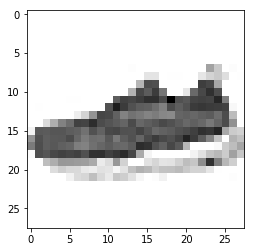

LABEL: 7
INPUT:


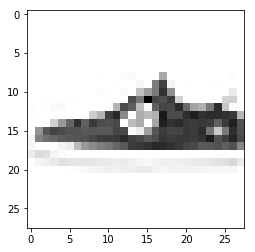

LABEL: 7
INPUT:


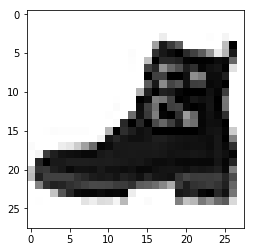

LABEL: 9


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,10000)

## TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (40,20,), (40,30,20) ]}

mlp = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)


best_arc = GridSearchCV(mlp, parameters, cv=5)
best_arc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.1, max_fun=15000,
                                     max_iter=300, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1227474, shuffle=True,
                                     solver='sgd', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [9]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(best_arc.best_params_, "\n")

print("Score with best parameters:")
print(best_arc.best_score_, "\n")

print("\nAll scores on the grid:")
print(best_arc.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (20,)} 

Score with best parameters:
0.7766666666666666 


All scores on the grid:
[0.705      0.77666667 0.76833333 0.73666667 0.59      ]


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [10]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 120, 240, 360, 480]}

mlp_diff = MLPClassifier(hidden_layer_sizes=best_arc.best_params_['hidden_layer_sizes'],max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

# recall to use cv=kf in GridSearchCV parameters to use the k-fold subdivision seen in the lectures

best_arc_diff = GridSearchCV(mlp_diff, parameters, cv=kf)
best_arc_diff.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(20,),
                                     learning_rate='constant',
                                     learning_rate_init=0.1, max_fun=15000,
                                     max_iter=300, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1227474, shuffle=True,
                                     solver='sgd', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
      

In [11]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(best_arc_diff.best_params_, "\n")

print("Score with best parameters:")
print(best_arc_diff.best_score_, "\n")

print("\nAll scores on the grid:")
print(best_arc_diff.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found:
{'batch_size': 240} 

Score with best parameters:
0.7866666666666667 


All scores on the grid:
[0.085      0.74       0.76833333 0.78666667 0.75666667 0.78333333]


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

As far as architecture is concerned, too simple and too complicated architecture produces low scores and the highest score is obtained with one layer with more neurons. Morover a batch size of one produce a very low score while other sizes produce more or less the same score. 

### TO DO 3

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate . 

In [12]:
import matplotlib.pyplot as plt


lr_list = [10**exp for exp in range(-3,0)]
scores = []

for learning_rate in lr_list:
    mlp_try = MLPClassifier(hidden_layer_sizes=best_arc.best_params_['hidden_layer_sizes'],batch_size=best_arc_diff.best_params_['batch_size'], max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,learning_rate_init=learning_rate,
                    learning_rate = 'constant')
    mlp_try.fit(X_train, y_train)
    scores.append(mlp_try.loss_curve_)

/home/michelepuppin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/michelepuppin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


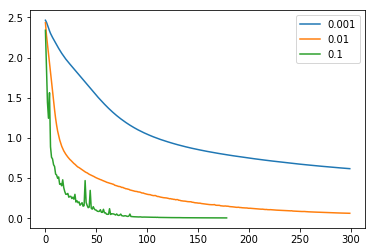

/home/michelepuppin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/michelepuppin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/michelepuppin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/michelepuppin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and th

RESULTS FOR NN

Best parameters set found:
{'learning_rate_init': 0.1}
Score with best parameters:
0.7666666666666666


In [13]:
for i in range(len(scores)):
    plt.plot(scores[i], label = str(lr_list[i]))
plt.legend()
plt.show()

mlp_lr = GridSearchCV(mlp_diff, {'learning_rate_init' : lr_list }, cv=kf)
mlp_lr.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_lr.best_params_)

print("Score with best parameters:")
print(mlp_lr.best_score_)

### QUESTION 2

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

For learning rate 0.001 and 0.01 stability is optimal, in fact we see a continuum line, and it converges very slowly (anyway faster for 0.01). For learning rate 0.1 we lose stability (but anyway it gets stable at convergence) and it converges much fater than the two others.

### TO DO 4

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate)from above. Plot the learning curve also for this case.


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.218822


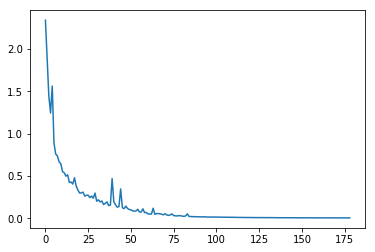

In [14]:
#get training and test error for the best NN model from CV

mlp_best_ever = MLPClassifier(hidden_layer_sizes=best_arc.best_params_['hidden_layer_sizes'],batch_size=best_arc_diff.best_params_['batch_size'], max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,learning_rate_init=mlp_lr.best_params_['learning_rate_init'],
                    learning_rate = 'constant')

mlp_best_ever.fit(X_train,y_train)

training_error = 1 - mlp_best_ever.score(X_train,y_train)
test_error = 1 - mlp_best_ever.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp_best_ever.loss_curve_, label='loss curve') 

## More data 
Now let's do the same but using 5000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer !!

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 5000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [495 531 491 476 492 499 529 497 468 522]


## TO DO 5

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

Iteration 1, loss = 1.39152978
Iteration 2, loss = 0.70457217
Iteration 3, loss = 0.55532524
Iteration 4, loss = 0.50488157
Iteration 5, loss = 0.46121884
Iteration 6, loss = 0.42829142
Iteration 7, loss = 0.41131086
Iteration 8, loss = 0.39193841
Iteration 9, loss = 0.37694786
Iteration 10, loss = 0.35644551
Iteration 11, loss = 0.35682357
Iteration 12, loss = 0.34074488
Iteration 13, loss = 0.34036196
Iteration 14, loss = 0.31236597
Iteration 15, loss = 0.30883374
Iteration 16, loss = 0.29161017
Iteration 17, loss = 0.30879455
Iteration 18, loss = 0.29236312
Iteration 19, loss = 0.27411905
Iteration 20, loss = 0.27615108
Iteration 21, loss = 0.26866722
Iteration 22, loss = 0.28827345
Iteration 23, loss = 0.25800976
Iteration 24, loss = 0.26220877
Iteration 25, loss = 0.24440462
Iteration 26, loss = 0.25541741
Iteration 27, loss = 0.23177441
Iteration 28, loss = 0.22920095
Iteration 29, loss = 0.23585929
Iteration 30, loss = 0.24288547
Iteration 31, loss = 0.21908033
Iteration 32, los

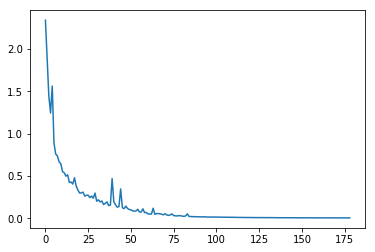

In [16]:
# use best architecture and params from before

mlp_best_ever_more = MLPClassifier(hidden_layer_sizes=best_arc.best_params_['hidden_layer_sizes'],batch_size=best_arc_diff.best_params_['batch_size'], max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,learning_rate_init=mlp_lr.best_params_['learning_rate_init'],
                    learning_rate = 'constant',verbose=True)

mlp_best_ever_more.fit(X_train,y_train)

training_error_more = 1 - mlp_best_ever_more.score(X_train,y_train)
test_error_more = 1 - mlp_best_ever_more.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error_more)
print ("Best NN test error: %f" % test_error_more)

plt.plot(mlp_best_ever.loss_curve_, label='loss curve') 

## QUESTION 3
Compare the train and test errors you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

Training errors is lower for the case with only 600 data points while the test error is lower for the larger set. Therefore enlarging the data set produce a better performance in the prediction since it has been training with more data. 

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=5000 training data points.

1 False 8
2 False 9
3 False 0
4 False 6
5 True 7
INPUT:


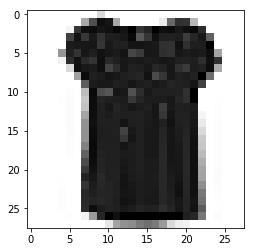

LABEL: 0
Large NN prediction:  0
NN prediction:  6


In [20]:
NN_prediction = mlp_best_ever.predict(X_test)
large_NN_prediction = mlp_best_ever_more.predict(X_test)

k = 0
h = False
while h == False:
    if (np.logical_and(y_test[k] != NN_prediction[k],y_test[k] == large_NN_prediction[k])):
        h = True
    k += 1
    print(k, h, NN_prediction[k])

plot_input(X_test,y_test,k-1)
print("Large NN prediction: ", large_NN_prediction[k-1])
print("NN prediction: ", NN_prediction[k-1])
        

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 5000 data points. The code is already provided, just fix variable names (e.g., replace mlp ,  mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


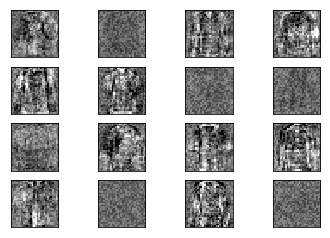

Weights with 5000 data points:


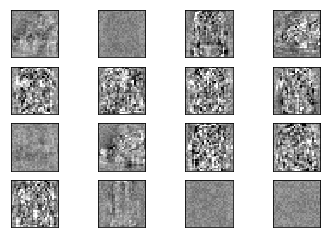

In [18]:
# The code is already provided, fix variable names in order to have it working with your implementation

print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_best_ever.coefs_[0].min(), mlp_best_ever.coefs_[0].max()
for coef, ax in zip(mlp_best_ever.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 5000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_best_ever_more.coefs_[0].min(), mlp_best_ever_more.coefs_[0].max()
for coef, ax in zip(mlp_best_ever_more.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 4

Describe what do you observe by looking at the weights

Looking at the weights in some cases you can get an idea of the shape of the clothe. There is no significative difference between the results for the two sets but maybe for the smaller one the shape the of clothes seems a little clearer while for the larger sets images seems less disturbed. 

### TO DO 9

Report the best SVM model and its parameters, you found in the last notebook (or check out the solution on the moodle webpage of the course). Fit it on a few data points and compute its training and test scores.

In [19]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

SVM = SVC(kernel='rbf',C=5,gamma=0.005)
SVM.fit(X_train,y_train)

print ('RESULTS FOR SVM')

SVM_training_error = 1 - SVM.score(X_train,y_train)

print("Training error SVM:")
print(SVM_training_error)

SVM_test_error =  1 -  SVM.score(X_test,y_test)

print("Test error SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training error SVM:
0.06699999999999995
Test error SVM:
0.14400000000000002


## QUESTION 5
Compare the results of SVM and of NN. Which one would you prefer? 

We can observe that the training error improves for the NN while the test error in better for the SVM algorithm so propbably NN is overfitting the results. Therefore I would choose the one that provides the lowest error for the test set.